In [25]:
import pandas as pd
import numpy as np

https://www.ncei.noaa.gov/pub/data/uscrn/products/daily01/

In [35]:
df["utc_datetime"] = df.utc_date.astype(str) + "-" + df.utc_time.astype(str).apply(lambda x: x.zfill(3))
df["utc_datetime"] = pd.to_datetime(df.utc_datetime, format='%Y%m%d-%H%M')
df['ymd'] = df.utc_datetime.dt.year.astype(str) + "-" + df.utc_datetime.dt.month.astype(str) + "-" + df.utc_datetime.dt.day.astype(str)

In [36]:
tempature_date = df[["utc_datetime", "air_temperature", "ymd"]].copy()
tempature_date.set_index("utc_datetime", inplace=True)
tempature_date.sort_values("utc_datetime",inplace=True)

In [37]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [47]:

temp = tempature_date.air_temperature

def hampel(x,k, t0=3):
    '''
    I just pasted this for a 
    quick outlier detection and replacement
    
    '''
    n = len(x)
    y = x #y is the corrected series
    L = 1.4826
    for i in range((k + 1),(n - k)):
        if np.isnan(x[(i - k):(i + k+1)]).all():
            continue
        x0 = np.nanmedian(x[(i - k):(i + k+1)])
        S0 = L * np.nanmedian(np.abs(x[(i - k):(i + k+1)] - x0))
        if (np.abs(x[i] - x0) > t0 * S0):
            y.loc[i] = x0
            print(y.dtype)
    return(y)

tempature_date["air_temperature"] = hampel(temp, k=6)

In [48]:
for day in tempature_date.ymd.unique():
    tmp = tempature_date[tempature_date.ymd == day]
    figure = plt.figure(figsize=(7.195, 7.195), dpi=100)
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(tmp.index, tmp.air_temperature, 'black')
    ax.xaxis.set_major_formatter( DateFormatter('%H:%M') )
    plt.axis('off')
    plt.savefig(f"pics/{day}.png", dpi=100)
    plt.close()
    # plt.show()
    

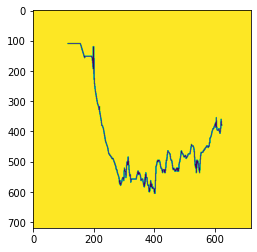

In [49]:
from PIL import Image
pic = Image.open(f"pics/2022-1-1.png").convert('L')
pic = np.asarray(pic)
plt.imshow(pic)
plt.show()

In [50]:
import os
pic_files = os.listdir("pics")
pic_array = np.zeros((719, 719, len(pic_files)))

In [51]:
for i, pic_file in enumerate(pic_files):
    tmp_pic = Image.open(f"pics/{pic_file}").convert('L')
    pic_array[:, :, i] = np.asarray(tmp_pic)

In [53]:
pic_array.shape

(719, 719, 17)

im wondering if we can 100,000 or so of these....